<a href="https://colab.research.google.com/github/jul1998/Pandas-Python/blob/main/Programming_Languages_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [ ]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [ ]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

In [ ]:
df.columns = ['DATE', 'TAG', 'POSTS']


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
df.head()


,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [ ]:
df.shape

(2398, 3)

**Challenge**: Count the number of entries in each column of the dataframe

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
df.count()

DATE     2398
TAG      2398
POSTS    2398
dtype: int64

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [ ]:
df.groupby("TAG").sum()

,POSTS
TAG,
assembly,41910
c,391006
c#,1573949
c++,784843
delphi,50398
go,66514
java,1879902
javascript,2459613
perl,67383


In [ ]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,173,173
c,173,173
c#,174,174
c++,173,173
delphi,173,173
go,158,158
java,173,173
javascript,173,173
perl,173,173


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [ ]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


In [ ]:
#df['DATE'] = pd.to_datetime(df['DATE'])
#df['DATE'] = pd.to_datetime(df['DATE']).dt.timestamp()
df['DATE'] = pd.to_numeric(df['DATE'])

In [ ]:
#df["DATE"] = df["DATE"].dt.strftime('%Y-%m-%d')
print(type(pd.to_datetime(df['DATE'][1])))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
df.head()

,DATE,TAG,POSTS
0,1214870400000000000,c#,3
1,1217548800000000000,assembly,8
2,1217548800000000000,c,83
3,1217548800000000000,c#,505
4,1217548800000000000,c++,164


## Data Manipulation



In [ ]:
reshape_df = df.pivot(index="DATE", values="DATE", columns="TAG")

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [ ]:
reshape_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
1214870400000000000,NaN,NaN,1.214870e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1217548800000000000,1.217549e+18,1.217549e+18,1.217549e+18,1.217549e+18,1.217549e+18,NaN,1.217549e+18,1.217549e+18,1.217549e+18,1.217549e+18,1.217549e+18,NaN,1.217549e+18,NaN
1220227200000000000,1.220227e+18,1.220227e+18,1.220227e+18,1.220227e+18,1.220227e+18,NaN,1.220227e+18,1.220227e+18,1.220227e+18,1.220227e+18,1.220227e+18,1.220227e+18,1.220227e+18,NaN
1222819200000000000,1.222819e+18,1.222819e+18,1.222819e+18,1.222819e+18,1.222819e+18,NaN,1.222819e+18,1.222819e+18,1.222819e+18,1.222819e+18,1.222819e+18,NaN,1.222819e+18,NaN
1225497600000000000,1.225498e+18,1.225498e+18,1.225498e+18,1.225498e+18,1.225498e+18,NaN,1.225498e+18,1.225498e+18,1.225498e+18,1.225498e+18,1.225498e+18,1.225498e+18,1.225498e+18,NaN


In [ ]:
reshape_df.fillna(0, inplace=True)

In [ ]:
reshape_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
1214870400000000000,0.000000e+00,0.000000e+00,1.214870e+18,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
1217548800000000000,1.217549e+18,1.217549e+18,1.217549e+18,1.217549e+18,1.217549e+18,0.0,1.217549e+18,1.217549e+18,1.217549e+18,1.217549e+18,1.217549e+18,0.000000e+00,1.217549e+18,0.0
1220227200000000000,1.220227e+18,1.220227e+18,1.220227e+18,1.220227e+18,1.220227e+18,0.0,1.220227e+18,1.220227e+18,1.220227e+18,1.220227e+18,1.220227e+18,1.220227e+18,1.220227e+18,0.0
1222819200000000000,1.222819e+18,1.222819e+18,1.222819e+18,1.222819e+18,1.222819e+18,0.0,1.222819e+18,1.222819e+18,1.222819e+18,1.222819e+18,1.222819e+18,0.000000e+00,1.222819e+18,0.0
1225497600000000000,1.225498e+18,1.225498e+18,1.225498e+18,1.225498e+18,1.225498e+18,0.0,1.225498e+18,1.225498e+18,1.225498e+18,1.225498e+18,1.225498e+18,1.225498e+18,1.225498e+18,0.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [ ]:
reshape_df.count()

TAG
assembly      174
c             174
c#            174
c++           174
delphi        174
go            174
java          174
javascript    174
perl          174
php           174
python        174
r             174
ruby          174
swift         174
dtype: int64

In [ ]:
reshape_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [ ]:
import matplotlib.pyplot as plt

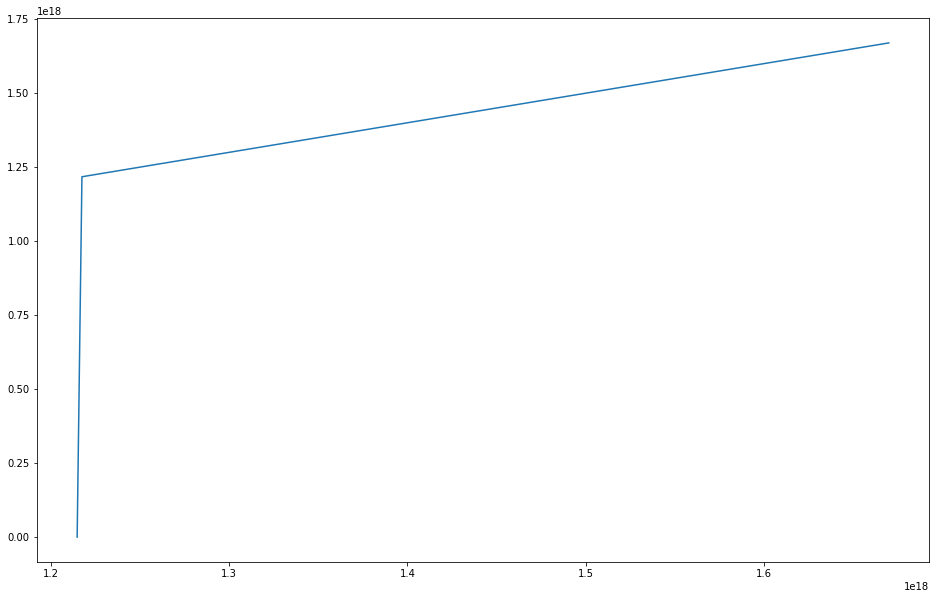

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(reshape_df.index, reshape_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 